# Convolutional Neural Networks for Image Classification

In [1]:
from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Visualizing the data

In [5]:
import matplotlib.pyplot as plt

(60000, 28, 28)

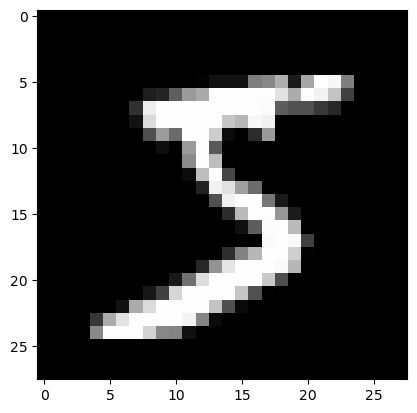

In [6]:
single_img = X_train[0]
plt.imshow(single_img, cmap='gray');

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Labels

In [9]:
from keras.utils import to_categorical

y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [10]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Processing X Data

We should normalize the X data

In [11]:
single_img.max()

255

In [12]:
scaled_X_train = X_train / X_train.max()
scaled_X_test = X_test / X_test.max()

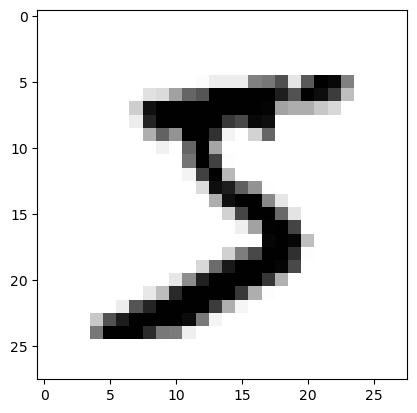

In [13]:
plt.imshow(scaled_X_train[0], cmap='gray_r');

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [14]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Training the Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

# CONVOLUTION LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))
# FLATTEN 2d --> 1d
model.add(Flatten())
# DENSE LAYER
model.add(Dense(128, activation='relu'))

# OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

## Train the Model

In [21]:
model.fit(X_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9173 - accuracy: 0.9506
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0722 - accuracy: 0.9814


In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9754


[0.09148748219013214, 0.9753999710083008]

## Evaluate the Model

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [25]:
preds = model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [27]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



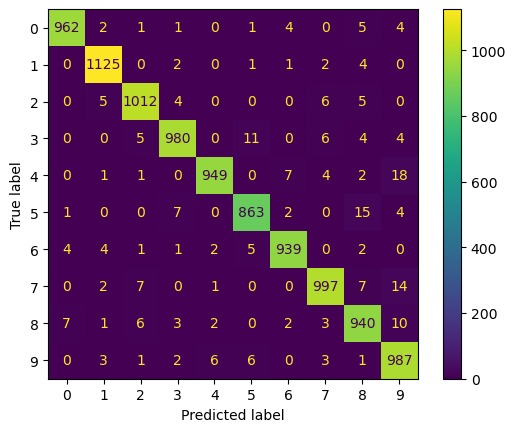

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)